In [75]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-whitegrid')
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['figure.figsize'] = 16,8

warnings.filterwarnings('ignore')

In [76]:
pain = pd.read_csv('data/pain.csv').drop(columns='Unnamed: 6')
pain.columns = pain.columns.str.replace(' ', '')
pain['date'] = pd.to_datetime(pain['date'] ,dayfirst=True)#.dt.strftime('%d/%m/%Y')
pain = pain.set_index('date')

In [77]:
sports = pd.read_csv('data/sport.csv')
sports.columns = sports.columns.str.replace(' ', '')
sports['date'] = pd.to_datetime(sports['date'],dayfirst=True)#.dt.strftime('%d/%m/%Y')
sports = sports.set_index('date')

## Images

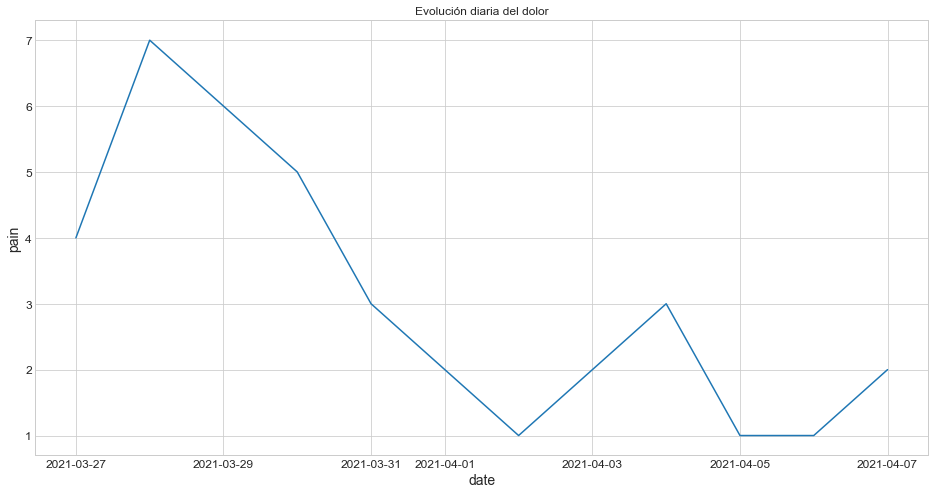

In [78]:
plt.figure()
plt.title('Evolución diaria del dolor')
sns.lineplot(y = pain.pain, x =pain.index )
plt.savefig('images/dolor_diario.png')
plt.show()

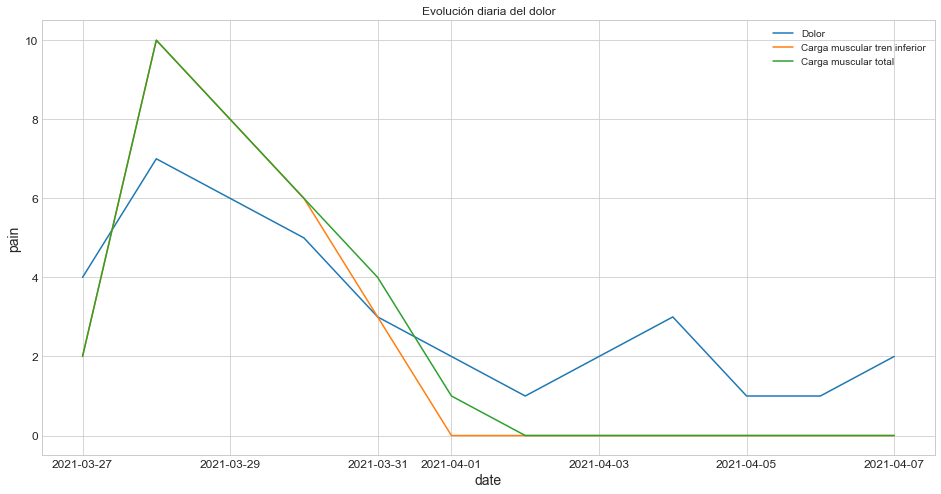

In [79]:
plt.figure()
plt.title('Evolución diaria del dolor')
sns.lineplot(y = pain.pain, x =pain.index,label = 'Dolor')
sns.lineplot(y = pain.leg_fatigue, x =pain.index,label = 'Carga muscular tren inferior')
sns.lineplot(y = pain.total_fatigue, x =pain.index,label = 'Carga muscular total')
plt.savefig('images/dolor_cargas_diario.png')
plt.show()

<Figure size 1152x576 with 0 Axes>

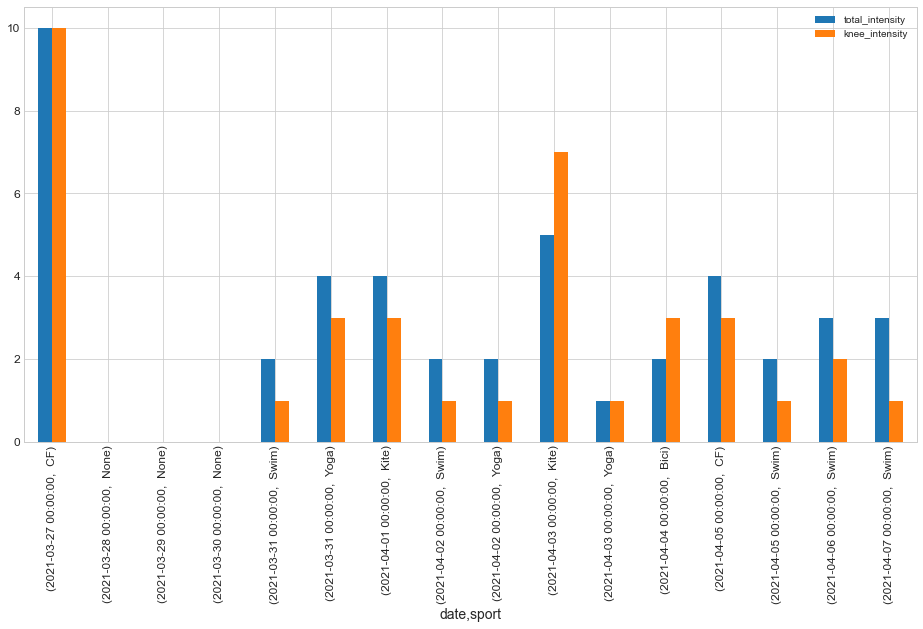

In [90]:
plt.figure()

sports.drop(columns="time").groupby(["date", "sport"]).agg("sum").plot.bar()
plt.savefig('images/deporte.png')

plt.show()